## **Lab 2 - Clustering Exercise**

In this exercise, we will apply our knowledge of clustering on the following dataset:

Dataset Link:
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

Clustering on this dataset will be done using KMeans, Hierarchal clustering and DBSCAN. Finding the optimal hypermaters for each and then choosing the best model among the three

Start by Importing needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Reading the dataset into a DataFrame

In [3]:
datadir="/Users/sylviasameh/Desktop/NETW1013/Lab2/CCGENERAL.csv"
df = pd.read_csv(datadir)

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df = df.fillna(0)

In [6]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
df = pd.get_dummies(df)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

## K-Means

Find the optimal Kmeans model

In [9]:
model = KMeans(n_clusters=2)
cluster_labels = model.fit_predict(scaled_df)

In [10]:
df['Cluster'] = cluster_labels
df.corr()['Cluster']

BALANCE                   0.543935
BALANCE_FREQUENCY         0.191860
PURCHASES                 0.005579
ONEOFF_PURCHASES          0.029431
INSTALLMENTS_PURCHASES   -0.040978
                            ...   
CUST_ID_C19187           -0.005612
CUST_ID_C19188           -0.005612
CUST_ID_C19189           -0.005612
CUST_ID_C19190           -0.005612
Cluster                   1.000000
Name: Cluster, Length: 8968, dtype: float64

Choose the optimal K and calculate the silhouette score for the best model.

In [11]:
ssd = []

for k in range(2,10):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_df)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)


Text(0, 0.5, ' Sum of Squared Distances')

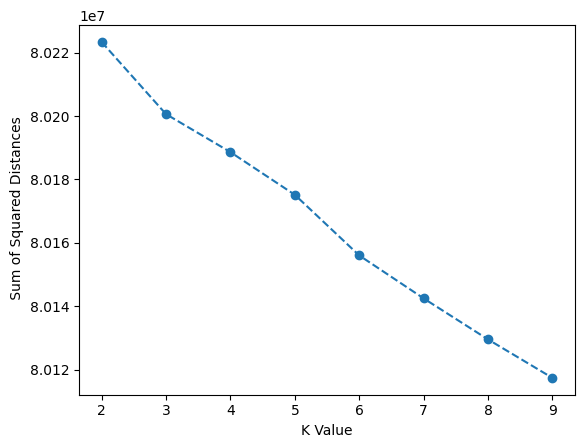

In [12]:
plt.plot(range(2,10),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

## Agglomerative Clustering

Find the optimal agglomerative clustering model.

In [16]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
s=[]
model = AgglomerativeClustering(n_clusters=2, metric="euclidean", linkage = "average")
cluster_labels = model.fit_predict(scaled_df)
cluster_labels
silhouette_score(scaled_df, cluster_labels)

/Users/sylviasameh/radioconda/lib/python3.10/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


0.03027293328292119

Choose the optimal K and calculate the silhouette score for the best model.

In [18]:
cluster_labels = model.fit_predict(df) 
silhouette_score(df, cluster_labels)

/Users/sylviasameh/radioconda/lib/python3.10/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


0.8860611465164399

## DBSCAN

Find the optimal DBSCAN model.

In [20]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2)
cluster_labels = dbscan.fit_predict(df)


Text(0.5, 0, 'Epsilon Value')

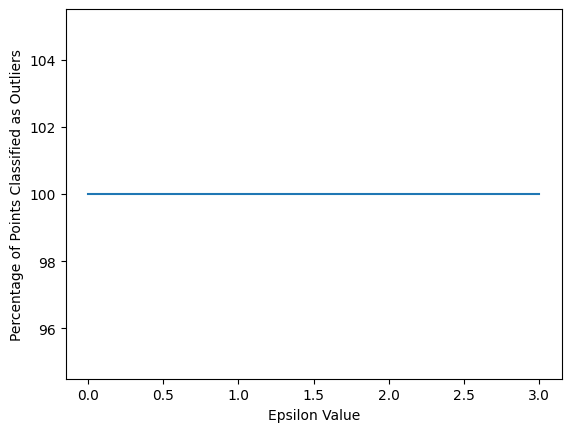

In [22]:
outlier_percent = []

for eps in np.linspace(0.001,3,20):
    
    # Create Model
    dbscan = DBSCAN(eps=eps)
    cluster_labels = dbscan.fit_predict(scaled_df)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(cluster_labels)
    
    outlier_percent.append(perc_outliers)
    
sns.lineplot(x=np.linspace(0.001,3,20),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

Find the parameters that optimize the performance of your model and calculate the silhouette score.

## Result Interpretation and Discussion

Which model was chosen? Why was it chosen and based on what?

In [ ]:
Agglomerative Clustering works better with the best silhouette score:0.8860611465164399